In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1

In [2]:
G1 = nx.Graph()
G1.add_nodes_from(range(3, 10))
G1.add_edges_from([(7, 8), (8, 9), (9, 3), (3, 5), (4, 6), (3, 7), (4, 7), (3, 4)])
G2 = nx.complete_graph(8)
# Intersection of G1nG2
V1,E1 = set(G1.nodes()), set(G1.edges())
V2,E2 = set(G2.nodes()), set(G2.edges())
H1 = nx.Graph()
V3,E3 = V1&V2, E1&E2
H1.add_nodes_from(V3)
H1.add_edges_from(E3)

In [3]:
H2 = nx.Graph()

V4,E4 = V1|V2, E1|E2

In [4]:
H2.add_nodes_from(V4)
H2.add_edges_from(E4)

print(nx.info(H2))
print(H2.nodes())
print(H2.edges())

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 31
Average degree:   6.2000
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 7), (0, 3), (0, 4), (0, 5), (0, 1), (0, 6), (0, 2), (1, 3), (1, 6), (1, 2), (1, 5), (1, 4), (1, 7), (2, 5), (2, 4), (2, 6), (2, 3), (2, 7), (3, 7), (3, 6), (3, 4), (3, 9), (3, 5), (4, 7), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)]


## Draw 1

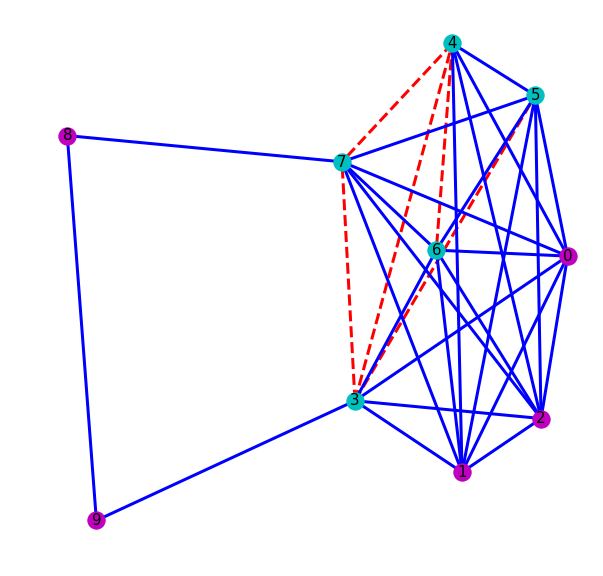

In [90]:
# Variables

first_edges = E3
second_edges = {(u, v) for (u, v) in E4 if (u, v) not in E3}

plt.figure(figsize = (10, 10))

pos = nx.spring_layout(H2,iterations=200,k=4)  # positions for all nodes

# Nodes
first_nodes = V3
second_nodes = [v for v in V4 if v not in V3]

nx.draw_networkx_nodes(first_nodes, pos, node_size = 300, node_color = 'c')
nx.draw_networkx_nodes(second_nodes, pos, node_size = 300, node_color = 'm')

# Edges
nx.draw_networkx_edges(H2, pos, edgelist = first_edges, width = 3, edge_color = 'r', style = 'dashed')
nx.draw_networkx_edges(H2, pos, edgelist = second_edges, width = 3, edge_color = 'b')

# Labels
nx.draw_networkx_labels(H2, pos, font_size = 15, font_family = 'sans-serif')

plt.axis('off')
plt.show()

# Problem 2

## Part A

In [6]:
edges_data = pd.read_csv('clean_edge.csv')
edges_data.head()

,LINK_ID,Source,Target,ROAD_USE,LANES,ROAD_RANK,ROAD_NAME,MULTI_LINK,CONNECT,MAX_SPD,...,WORKSTATE,DEPT_CODE,STNL_REG,ROAD_TYPE,ROAD_NO,TMPID,UPLOAD_ID,SOSFNODEID,SOSTNODEID,SHAPE_STLe
0,1920041500,1920013900,1920015600,0,3.0,104,외솔큰길,0,0,70.0,...,5,31000,192,0,-,NaN,NaN,NaN,NaN,542.887147
1,1920041600,1920015600,1920013900,0,3.0,104,외솔큰길,0,0,70.0,...,5,31000,192,0,-,NaN,NaN,NaN,NaN,544.624502
2,1920046600,1920015600,1920015800,0,5.0,104,번영로,0,0,70.0,...,5,31000,192,0,-,NaN,NaN,NaN,NaN,260.278626
3,1920046500,1920015800,1920015600,0,5.0,104,번영로,0,0,70.0,...,5,31000,192,0,-,NaN,NaN,NaN,NaN,261.486154
4,1920122800,1920006400,1920037700,0,1.0,104,행복5길,0,0,60.0,...,5,31000,192,0,-,20111128011000,NaN,NaN,20111128011000,215.945846


In [7]:
edges_data.columns

Index(['LINK_ID', 'Source', 'Target', 'ROAD_USE', 'LANES', 'ROAD_RANK',
       'ROAD_NAME', 'MULTI_LINK', 'CONNECT', 'MAX_SPD', 'REST_VEH', 'REST_W',
       'REST_H', 'REMARK', 'USER_ID', 'WORKSTATE', 'DEPT_CODE', 'STNL_REG',
       'ROAD_TYPE', 'ROAD_NO', 'TMPID', 'UPLOAD_ID', 'SOSFNODEID',
       'SOSTNODEID', 'SHAPE_STLe'],
      dtype='object')

In [16]:
nodes_data = pd.read_csv('clean_node.csv')
nodes_data.head()

,Id,NODE_TYPE,NODE_NAME,TURN_P,REMARK,USER_ID,WORKSTATE,DEPT_CODE,STNL_REG,TMPID,UPLOAD_ID,latitude,longitude
0,1920003500,104,사례교,0,NaN,ussi,5,31000.0,192,NaN,NaN,35.594499,129.347704
1,1920003600,104,사례교,0,NaN,ussi,5,31000.0,192,NaN,NaN,35.595572,129.347603
2,1920002100,101,-,1,NaN,ussi,5,31000.0,192,NaN,NaN,35.564435,129.327960
3,1920002600,101,동중 삼거리,1,NaN,ussi,5,31000.0,192,NaN,NaN,35.574493,129.338874
4,1920002400,101,중구청 삼거리,1,NaN,ussi,5,31000.0,192,NaN,NaN,35.569200,129.331570


In [17]:
nodes_data.columns

Index(['Id', 'NODE_TYPE', 'NODE_NAME', 'TURN_P', 'REMARK', 'USER_ID',
       'WORKSTATE', 'DEPT_CODE', 'STNL_REG', 'TMPID', 'UPLOAD_ID', 'latitude',
       'longitude'],
      dtype='object')

## Part B

In [18]:
G = nx.Graph()

# nodes
target_names_nodes = ['NODE_NAME', 'STNL_REG', 'latitude', 'longitude']

for d in list(nodes_data.columns):
    if d == 'Id':
        G.add_nodes_from(list(nodes_data[d]))
    elif d in target_names_nodes:
        d_dict = {n:d for n,d in zip(G.nodes(), list(nodes_data[d]))}
        nx.set_node_attributes(G, name = d,values = d_dict)
        
# edges
target_names_edges = ['LINK_ID', 'STNL_REG', 'SHAPE_STLe', 'LANES']

edges = [(s,t) for s,t in zip(edges_data['Source'],edges_data['Target'])]
G.add_edges_from(edges)

for d in list(edges_data.columns):
    if d in target_names_edges:
        d_dict = {n:d for n,d in zip(G.edges(), list(edges_data[d]))}
        nx.set_edge_attributes(G, name = d,values = d_dict)

In [19]:
nx.is_connected(G)

True

## Part C

In [20]:
G_degree = dict(nx.degree(G,weight='weight'))
G_bc = nx.betweenness_centrality(G)

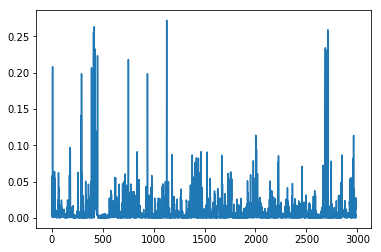

In [21]:
plt.plot(G_bc.values())

## Part D

In [22]:
# Construct dictionary for position
pos_dict = {}
for n1 in G.nodes:
    longitude = G.node[n1]['longitude']
    latitude = G.node[n1]['latitude']
    pos_dict[n1] = np.array([longitude,latitude])
    
# LANES
lanes_list = list([])
for u1, v1 in G.edges:
    lanes_list.append(G[u1][v1]['LANES'])

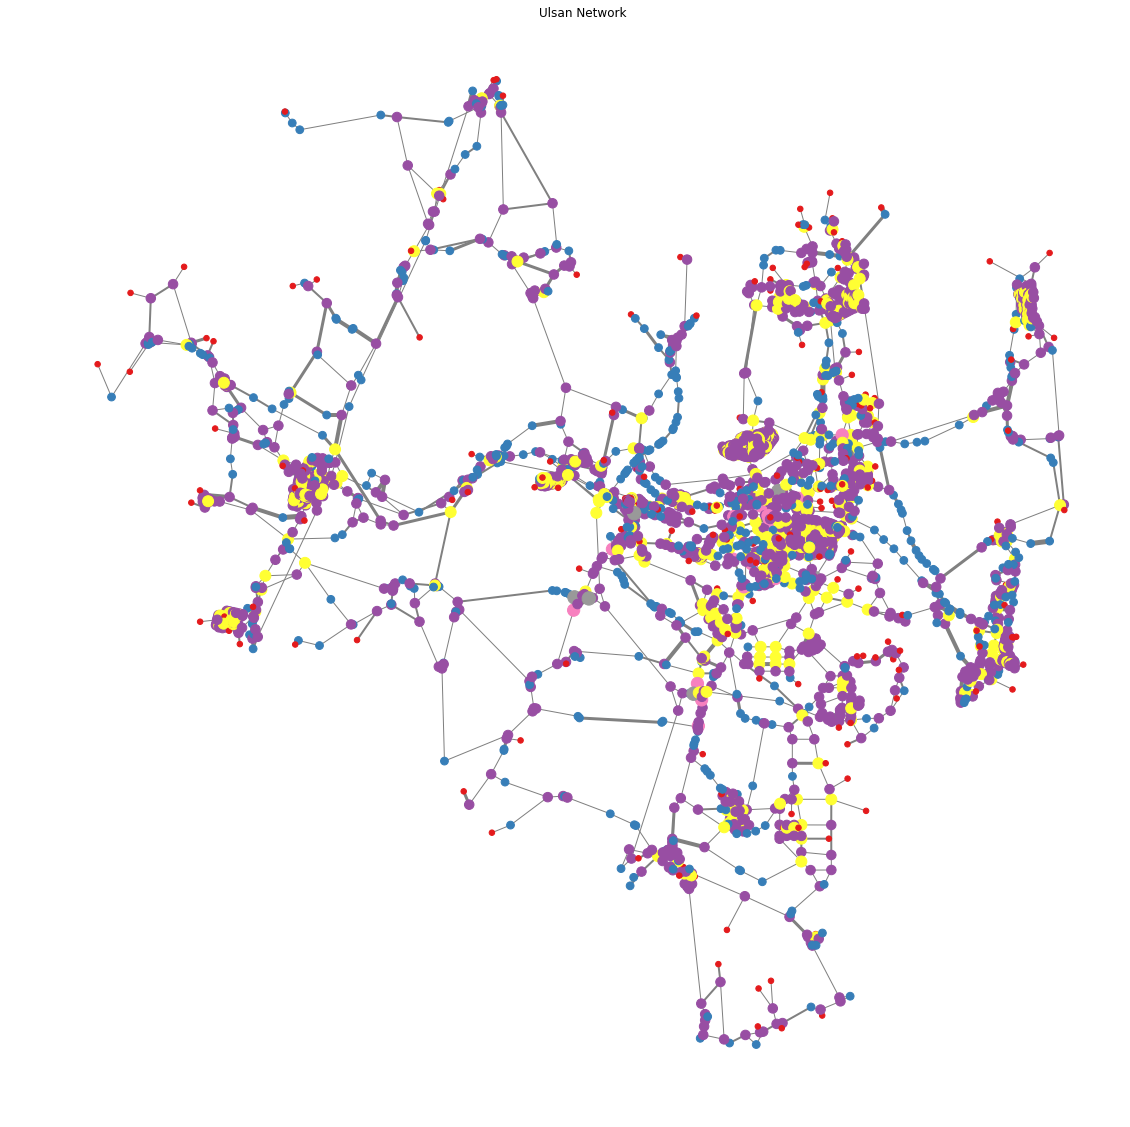

In [36]:
# nodesize: degree, nodecolor: degree, colormap: set1, edge color: grey, edgewidth: LANES

#Draw network
plt.figure(figsize=(15,15)) #Control figure size
nx.draw(G, pos_dict,
        node_size = [d*30 for d in G_degree.values()], # node size
        node_color= list(G_degree.values()), # data for node color
        cmap=plt.cm.Set1, # color_map for node
        edge_color='grey', # data for edge color
        width=lanes_list # edge width
       )
plt.title('Ulsan Network');

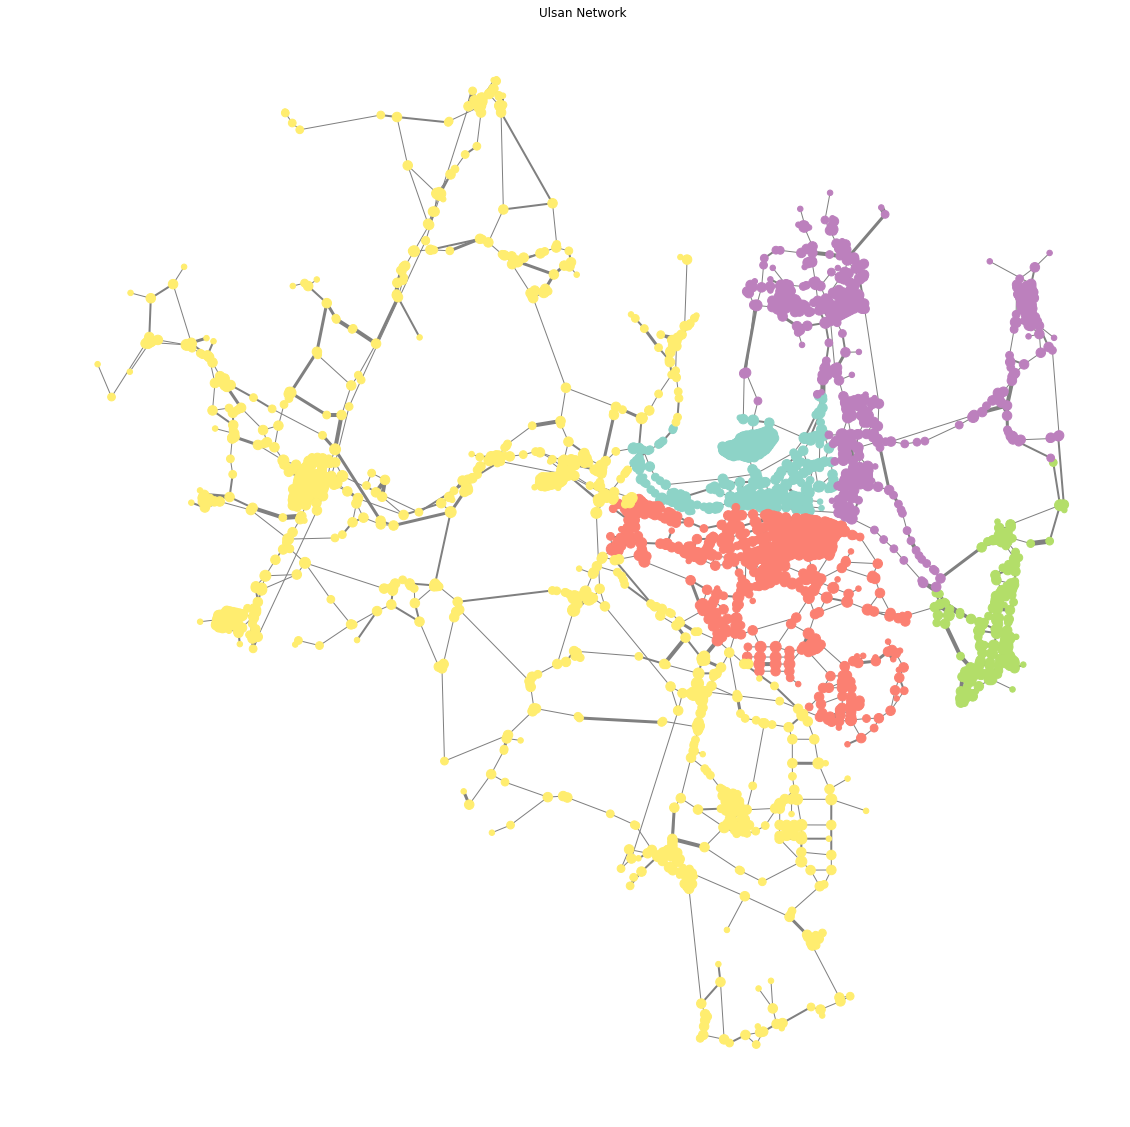

In [42]:
# nodesize: degree, nodecolor: stel_reg, colormap: set3, edge color: grey, edgewidth: LANES

# STNL_REG
G_stnl_reg = list([])
for n1 in G.nodes:
    G_stnl_reg.append(G.node[n1]['STNL_REG'])

#Draw network
plt.figure(figsize=(15,15)) #Control figure size
nx.draw(G, pos_dict,
        node_size = [d*30 for d in G_degree.values()], # node size
        node_color= G_stnl_reg, # data for node color
        cmap=plt.cm.Set3, # color_map for node
        edge_color='grey', # data for edge color
        width=lanes_list # edge width
       )
plt.title('Ulsan Network');

## Part E

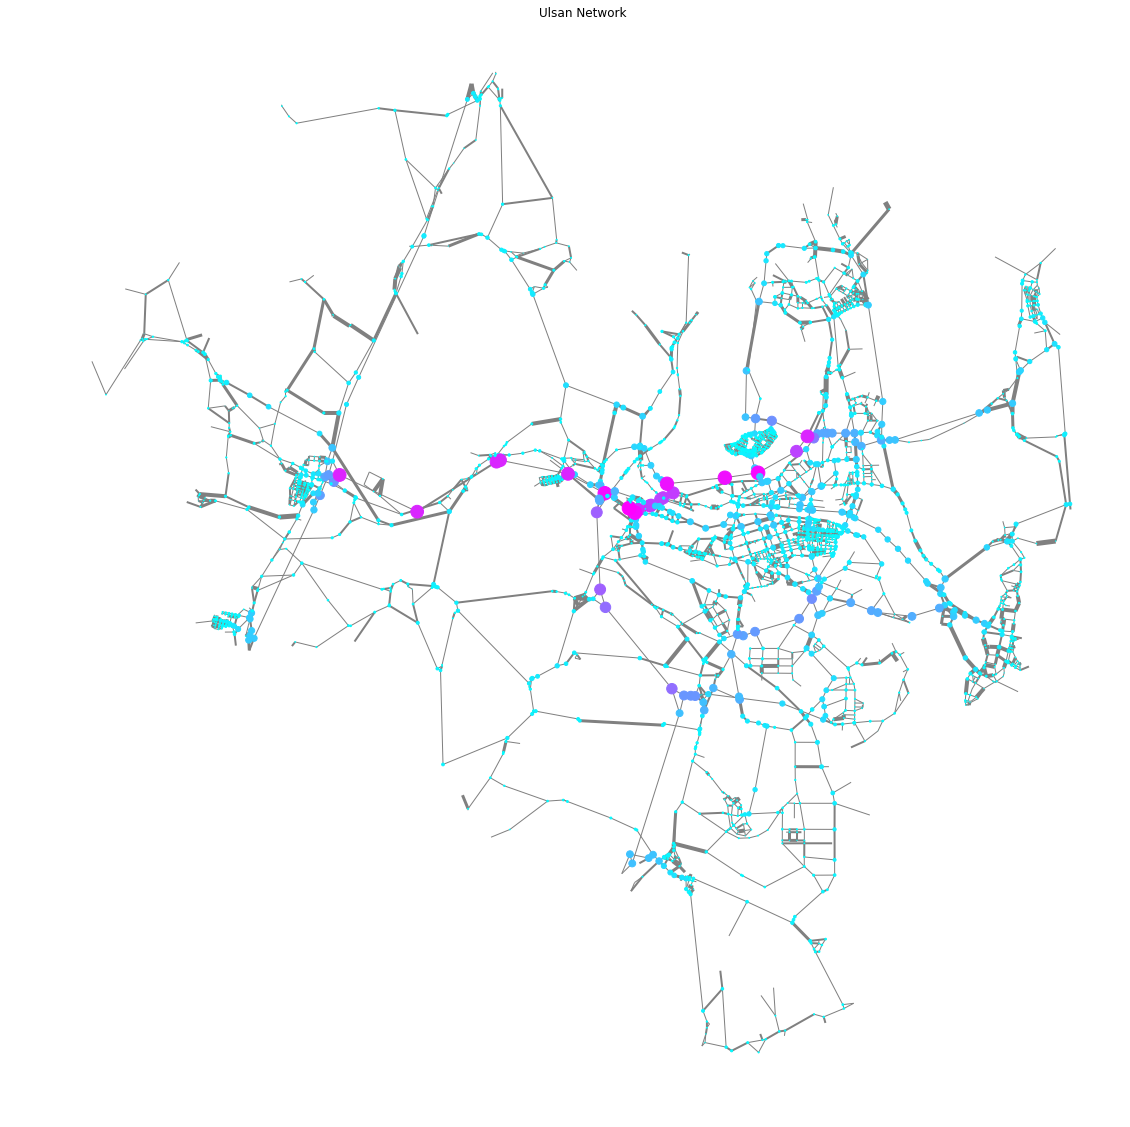

In [52]:
# nodesize: bc, nodecolor: bc, colormap: cool, edge color: grey, edgewidth: LANES

#Draw network
plt.figure(figsize=(15,15)) #Control figure size
nx.draw(G, pos_dict,
        node_size = [d*700 for d in G_bc.values()], # node size
        node_color= list(G_bc.values()), # data for node color
        cmap=plt.cm.cool, # color_map for node
        edge_color='grey', # data for edge color
        width=lanes_list # edge width
       )
plt.title('Ulsan Network');

In [88]:
# Make dictionary of labels
tol = 0.15 # tolerance

labels_dict = {}

for key in G_bc:
    if tol < G_bc[key]:
        labels_dict[key] = key

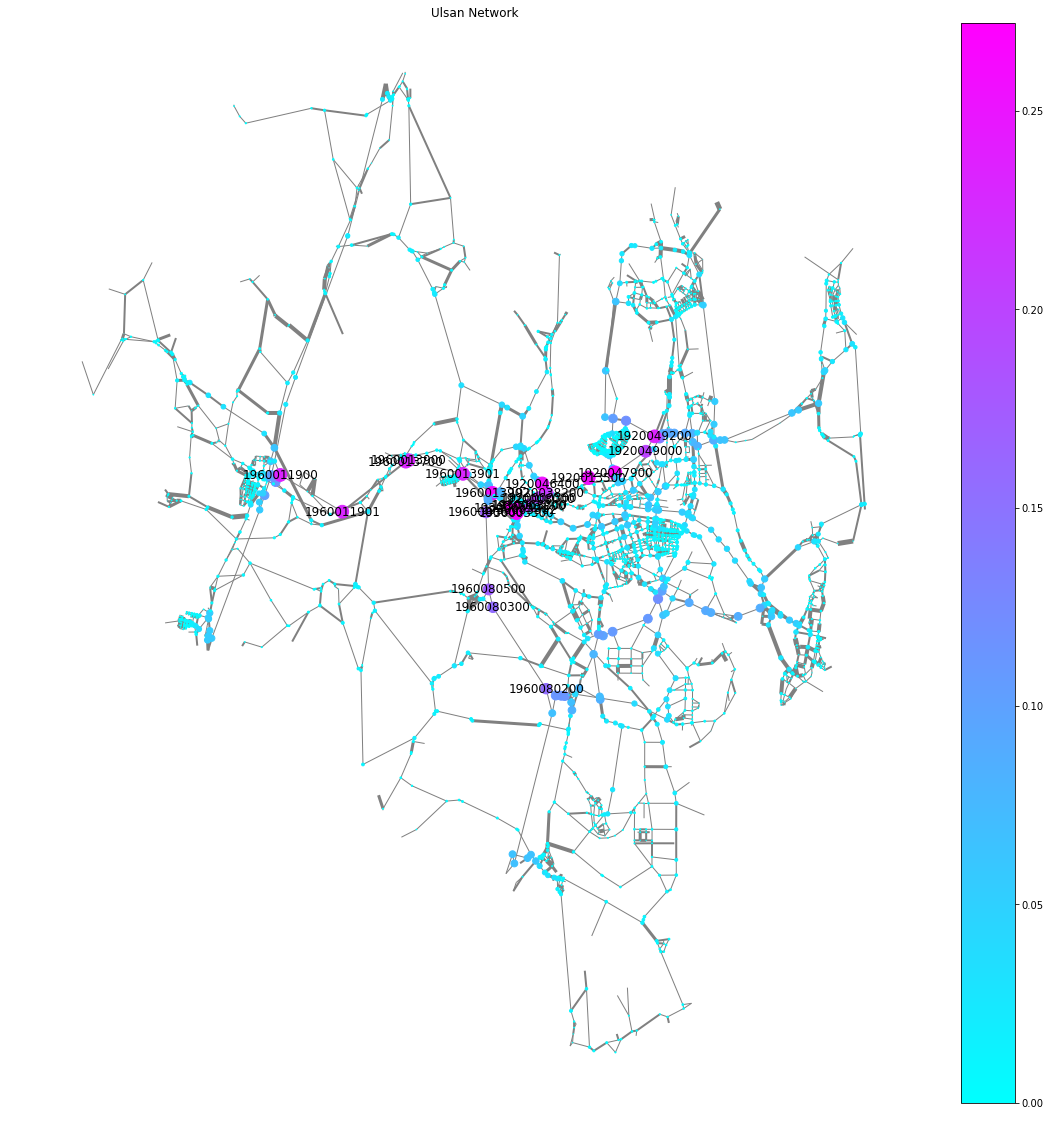

In [87]:
# nodesize: bc, nodecolor: bc, colormap: cool, edge color: grey, edgewidth: LANES

#Draw network
plt.figure(figsize=(15,15)) #Control figure size
nx.draw(G, pos_dict,
        labels=labels_dict,
        node_size = [d*700 for d in G_bc.values()], # node size
        node_color= list(G_bc.values()), # data for node color
        cmap=plt.cm.cool, # color_map for node
        edge_color='grey', # data for edge color
        width=lanes_list # edge width
       )
plt.title('Ulsan Network');

# Draw Color Bar
vmin = min(G_bc.values())
vmax = max(G_bc.values())
sm = plt.cm.ScalarMappable(cmap = plt.cm.cool, norm = plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []
plt.colorbar(sm)
ax = plt.gca()
ax.set_axis_off()